In [1]:
import pandas as pd
df=pd.read_csv('Tweets.csv')

In [2]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### check duplicates

In [3]:
dups=df.groupby('tweet_id').airline.count().reset_index()

In [4]:
dups.loc[dups.airline>1]

,tweet_id,airline
8228,569600137296633856,2
8247,569601363799359488,2
8582,569621879633391616,2
8592,569622568459636736,2
9502,569680231012773888,2
...,...,...
14464,570307434113310720,2
14470,570307948171423745,2
14471,570307949614256128,2
14472,570308064185880577,2


In [5]:
df.loc[df.tweet_id==569600137296633856]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12033,569600137296633856,positive,0.9236,NaN,0.0,American,positive,douglaskgordon,NaN,0,@AmericanAir Thank you.....you do the same!!,NaN,2015-02-22 12:50:30 -0800,"Caribbean, New York and Miami.",Indiana (East)
14556,569600137296633856,positive,1.0000,NaN,NaN,American,NaN,douglaskgordon,NaN,0,@AmericanAir Thank you.....you do the same!!,NaN,2015-02-22 12:50:30 -0800,"Caribbean, New York and Miami.",Indiana (East)


In [6]:
df.loc[df.tweet_id==570308309682675712]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11879,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito


### first check of some variables

In [7]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:
len(df)

14640

In [9]:
len(df.name.unique())

7701

In [10]:
len(df.tweet_location.unique())

3082

In [11]:
df.tweet_location.value_counts(normalize=True)

Boston, MA            0.015847
New York, NY          0.015746
Washington, DC        0.015141
New York              0.012819
USA                   0.012718
                        ...   
Tennessee Original    0.000101
In the kitchen        0.000101
The Bull City, NC     0.000101
Ptown, VA             0.000101
Bechtelsville, PA     0.000101
Name: tweet_location, Length: 3081, dtype: float64

In [12]:
len(df.user_timezone.unique())

86

### database for modeling

In [13]:
df2=df[['tweet_id', 'airline_sentiment', 'airline',
       'retweet_count', 'text', 'tweet_created', 'user_timezone']]

In [14]:
len(df2)

14640

In [15]:
df2=df2.drop_duplicates()

In [16]:
len(df2)

14503

In [17]:
dups=df2.groupby('tweet_id').airline.count().reset_index()

In [18]:
dups.loc[dups.airline>1]

,tweet_id,airline
14033,570268326250745856,2
14037,570268875872473088,2
14049,570270435478122497,2
14071,570271574462369793,2
14079,570271896887017472,2
14103,570274148364242947,2
14117,570275314036649984,2
14123,570275726483542016,2
14177,570280641771790336,2
14199,570282469791911936,2


In [19]:
df2.loc[df2.tweet_id==570268326250745856]

,tweet_id,airline_sentiment,airline,retweet_count,text,tweet_created,user_timezone
12019,570268326250745856,neutral,American,0,@AmericanAir my flight to DFW from LIT on my w...,2015-02-24 09:05:38 -0800,Central Time (US & Canada)
12180,570268326250745856,negative,American,0,@AmericanAir my flight to DFW from LIT on my w...,2015-02-24 09:05:38 -0800,Central Time (US & Canada)


#### delete duplicates: keep last record

In [20]:
df2=df2.groupby('tweet_id').tail(1)

In [21]:
len(df2)

14485

In [22]:
df2.tweet_created.str.slice(0,10).value_counts().sort_index()

2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3073
2015-02-23    3026
2015-02-24    1197
Name: tweet_created, dtype: int64

In [23]:
df2['date']=df2.tweet_created.str.slice(0,10)

In [24]:
pv=pd.pivot_table(df2,'tweet_id','date','airline_sentiment','count',0)
pv=pv[1:]

In [25]:
pv2=pv.apply(lambda x: x/x.sum(),axis=1)

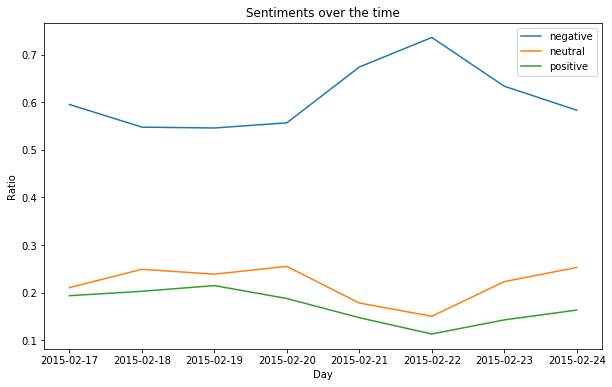

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(pv2.index,pv2.negative,label='negative')
plt.plot(pv2.index,pv2.neutral,label='neutral')
plt.plot(pv2.index,pv2.positive,label='positive')

plt.legend()
plt.title('Sentiments over the time')
plt.ylabel('Ratio')
plt.xlabel('Day')
plt.savefig('Global.png')
plt.show()

In [27]:
air=pd.pivot_table(df2,'tweet_id',['date','airline'],'airline_sentiment','count',0)

In [28]:
air=air.loc[~air.index.isin(['2015-02-16'], level=0)]

In [29]:
air2=air.apply(lambda x: x/x.sum(),axis=1)

In [30]:
df2.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

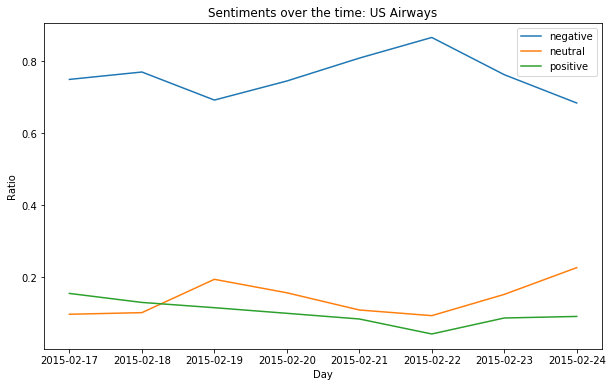

In [31]:
airline='US Airways'
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(pv2.index,air2.loc[air2.index.isin([airline], level=1)].negative,label='negative')
plt.plot(pv2.index,air2.loc[air2.index.isin([airline], level=1)].neutral,label='neutral')
plt.plot(pv2.index,air2.loc[air2.index.isin([airline], level=1)].positive,label='positive')

plt.legend()
plt.title('Sentiments over the time: ' + airline)
plt.ylabel('Ratio')
plt.xlabel('Day')
plt.savefig(airline +'.png')
plt.show()

In [32]:
American=air2.loc[air2.index.isin(['American'], level=1)][-3:]

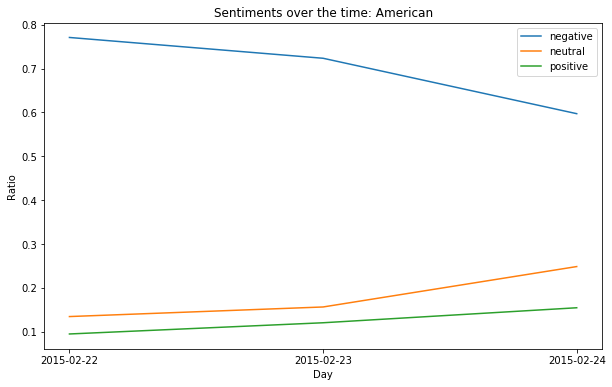

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(pv2.index[-3:],American.negative,label='negative')
plt.plot(pv2.index[-3:],American.neutral,label='neutral')
plt.plot(pv2.index[-3:],American.positive,label='positive')

plt.legend()
plt.title('Sentiments over the time: American')
plt.ylabel('Ratio')
plt.xlabel('Day')
plt.savefig('American.png')
plt.show()

In [34]:
pct = (df2.groupby(['airline_sentiment'])['airline']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())

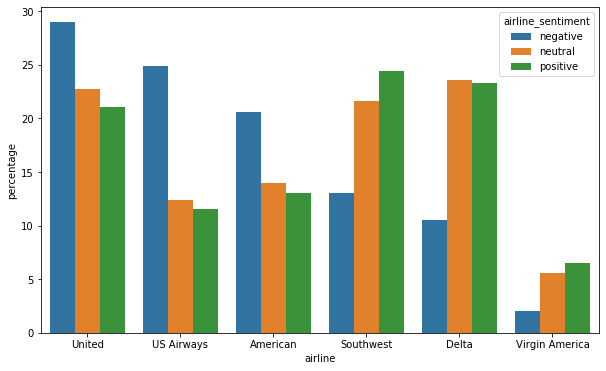

In [35]:
import math
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="airline", y="percentage", hue="airline_sentiment", data=pct)
plt.show()

### treatment of text

In [36]:
df2.text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14485, dtype: object

### Try SnowballStemmer, PorterStemmer, LancasterStemmer, WordNetLemmatizer;
#### better: SnowballStemmer

In [37]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [38]:
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [39]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    http_clean = " ".join([word for word in letters_only.split() if 'http' not in word])
    words = http_clean.lower().split() 
    stops = set(stopwords.words("english")) 
    whitelist = ["t", "not", "no"]
    meaningful_words = [w for w in words if (w not in stops or w in whitelist) ]
    st = SnowballStemmer(language='english')
    #st = PorterStemmer()
    #st = LancasterStemmer()
    stemmed = " ".join([st.stem(word) for word in meaningful_words])
    return(stemmed) 

In [40]:
df2['clean_tweet']=df2['text'].apply(lambda x: tweet_to_words(x))

In [41]:
df2['target']=df2.airline_sentiment.replace({'negative':0,'neutral':1,'positive':2})

In [42]:
df2[['clean_tweet','text']][-10:].values

array([['americanair thank', '@AmericanAir Thanks! He is.'],
       ['americanair thx noth get us countri back us broken plane come get anoth one',
        '@AmericanAir thx for nothing on getting us out of the country and back to US. Broken plane? Come on. Get another one.'],
       ['americanair tilleymonsta georg t look good pleas follow link start refund process t co gr dl',
        "“@AmericanAir: @TilleyMonsta George, that doesn't look good. Please follow this link to start the refund process: http://t.co/4gr39s91Dl”😂"],
       ['americanair flight cancel flightl leav tomorrow morn auto rebook tuesday night flight need arriv monday',
        '@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday.'],
       ['americanair right cue delay',
        '@AmericanAir right on cue with the delays👌'],
       ['americanair thank got differ flight chicago',
        '@AmericanAir thank you we got on a diffe

In [43]:
train=df2.loc[df2.date<'2015-02-23',['target','clean_tweet','airline']]
test=df2.loc[df2.date>='2015-02-23',['target','clean_tweet','airline']]

In [44]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [45]:
train.loc[~train.airline.isin(['Delta','Southwest','Virgin America'])].target.value_counts()

0    4572
1     938
2     689
Name: target, dtype: int64

In [46]:
trainf=pd.concat([train.loc[~(train.airline.isin(['Delta','Southwest','Virgin America'])) & (train.target==0)].sample(1200),
                 train.loc[~(train.airline.isin(['Delta','Southwest','Virgin America'])) & (train.target!=0)],
                 train.loc[(train.airline.isin(['Delta','Southwest','Virgin America']))]],axis=0)

In [47]:
trainf_clean_tweet=[]
for tweet in trainf['clean_tweet']:
    trainf_clean_tweet.append(tweet)

### Try CountVectorizer, TfidfVectorizer
#### better: TfidfVectorizer

In [211]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

v = CountVectorizer(strip_accents='unicode', ngram_range=(1, 2), max_df=0.75)
freq_vector = v.fit_transform(train_clean_tweet)

tfidf = TfidfVectorizer(strip_accents='unicode', ngram_range=(1, 2), max_df=0.75, sublinear_tf=True)
X_train = tfidf.fit_transform(train_clean_tweet)

In [212]:
freq_vector2 = v.transform(test_clean_tweet)

X_test = tfidf.transform(test_clean_tweet)

In [213]:
X_train2 = tfidf.fit_transform(trainf_clean_tweet)

In [214]:
X_test2 = tfidf.transform(test_clean_tweet)

# Best model

## SVC

#### CountVectorizer

In [216]:
from sklearn.svm import SVC
svc=SVC(random_state=0)
parameters = {'C': [1, 1.5, 2, 2.5, 3]} #'kernel':('linear', 'rbf', 'sigmoid'),
clf = GridSearchCV(svc, parameters,cv=3)
clf.fit(freq_vector,train.target)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 1.5, 2, 2.5, 3]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [217]:
clf.best_params_

{'C': 1.5}

In [227]:
svc=SVC(random_state=0,kernel='rbf',C=1.5)
svc.fit(freq_vector,train.target)

SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [279]:
svc_pred=svc.predict(freq_vector2)

In [280]:
accuracy_score(svc_pred,test.target)

0.7738574473123372

In [230]:
test['svc_pred']=svc_pred

In [231]:
for company in test.airline.unique():
    print(company,'ACCURACY: ', round(accuracy_score(test.loc[test.airline==company,'svc_pred'],test.loc[test.airline==company,'target'])*100,1))

Virgin America ACCURACY:  71.7
United ACCURACY:  78.8
Southwest ACCURACY:  71.5
Delta ACCURACY:  68.8
US Airways ACCURACY:  79.5
American ACCURACY:  80.5


In [283]:
import pickle

pickle.dump(svc,open('sentiment_model.pkl','wb'))

#### Tfidf

In [203]:
from sklearn.svm import SVC
svc=SVC(random_state=0)
parameters = {'C': [1, 1.5, 2, 2.5, 3]} #'kernel':('linear', 'rbf', 'sigmoid'),
clf = GridSearchCV(svc, parameters,cv=3)
clf.fit(X_train,train.target)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 1.5, 2, 2.5, 3]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [204]:
clf.best_params_

{'C': 2}

In [222]:
svc=SVC(random_state=0,kernel='rbf',C=2)
svc.fit(X_train,train.target)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [223]:
svc_pred=svc.predict(X_test)

In [224]:
accuracy_score(svc_pred,test.target)

0.772436656405399

In [225]:
test['svc_pred']=svc_pred

In [226]:
for company in test.airline.unique():
    print(company,'ACCURACY: ', round(accuracy_score(test.loc[test.airline==company,'svc_pred'],test.loc[test.airline==company,'target'])*100,1))

Virgin America ACCURACY:  72.5
United ACCURACY:  79.7
Southwest ACCURACY:  72.8
Delta ACCURACY:  69.8
US Airways ACCURACY:  80.3
American ACCURACY:  78.6


#### As we can see in the initial plots, the companies: Virgin America, Delta and Southwest have a different distribution and it brings problems of performance;

# Other Models

## Random Forest

#### CountVectorizer

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rf_clf=RandomForestClassifier(random_state=0)
parameters = {'n_estimators':[200,300,400]} #'criterion':('gini', 'entropy')
clf = GridSearchCV(rf_clf, parameters,cv=3)
clf.fit(freq_vector,train.target)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [246]:
clf.best_params_

{'n_estimators': 400}

#### Probably more trees will be better, however it's a lot of running time so svc is better.

In [247]:
rf=RandomForestClassifier(random_state=0,n_estimators=400)
rf.fit(freq_vector,train.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [277]:
rf_pred=rf.predict(freq_vector2)

In [278]:
from sklearn.metrics import accuracy_score
accuracy_score(rf_pred,test.target)

0.7494672034098981

In [250]:
test['rf_pred']=rf_pred

In [251]:
for company in test.airline.unique():
    print(company,'ACCURACY: ', round(accuracy_score(test.loc[test.airline==company,'rf_pred'],test.loc[test.airline==company,'target'])*100,1))

Virgin America ACCURACY:  66.7
United ACCURACY:  76.4
Southwest ACCURACY:  70.4
Delta ACCURACY:  64.3
US Airways ACCURACY:  78.5
American ACCURACY:  77.9


#### Tfidf

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rf_clf=RandomForestClassifier(random_state=0)
parameters = {'n_estimators':[200,300,400],
             'criterion':('gini', 'entropy')}
clf = GridSearchCV(rf_clf, parameters,cv=3)
clf.fit(X_train,train.target)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [151]:
clf.best_params_

{'criterion': 'entropy', 'n_estimators': 400}

In [152]:
rf=RandomForestClassifier(random_state=0,n_estimators=400, criterion='entropy')
rf.fit(X_train,train.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [153]:
rf_pred=rf.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(rf_pred,test.target)

0.7568079564290788

In [57]:
test['rf_pred']=rf_pred

In [58]:
for company in test.airline.unique():
    print(company,'ACCURACY: ', round(accuracy_score(test.loc[test.airline==company,'rf_pred'],test.loc[test.airline==company,'target'])*100,1))

Virgin America ACCURACY:  70.8
United ACCURACY:  75.0
Southwest ACCURACY:  70.2
Delta ACCURACY:  64.5
US Airways ACCURACY:  78.9
American ACCURACY:  78.7


#### undersampling (doesn't pay off)

In [155]:
rf2=RandomForestClassifier(random_state=0,n_estimators=400, criterion='entropy')
rf2.fit(X_train2,trainf.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [156]:
rf2_pred=rf2.predict(X_test2)

In [157]:
accuracy_score(rf2_pred,test.target)

0.7269713473833768

## MultinomialNB

#### CountVectorizer

In [271]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
parameters = {'alpha': [0.7,0.8,0.9, 1, 1.1, 1.2]} 
clf = GridSearchCV(nb, parameters,cv=3)
clf.fit(freq_vector,train.target)

GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.7, 0.8, 0.9, 1, 1.1, 1.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [272]:
clf.best_params_

{'alpha': 1.1}

In [264]:
nb=MultinomialNB(alpha=1.1)
nb.fit(freq_vector,train.target)

MultinomialNB(alpha=1.1, class_prior=None, fit_prior=True)

In [265]:
nb_pred=nb.predict(freq_vector2)

In [266]:
accuracy_score(nb_pred,test.target)

0.6985555292446128

In [267]:
test['nb_pred']=nb_pred

In [268]:
for company in test.airline.unique():
    print(company,'ACCURACY: ', round(accuracy_score(test.loc[test.airline==company,'nb_pred'],test.loc[test.airline==company,'target'])*100,1))

Virgin America ACCURACY:  52.5
United ACCURACY:  73.4
Southwest ACCURACY:  64.1
Delta ACCURACY:  49.2
US Airways ACCURACY:  77.1
American ACCURACY:  74.4


#### Tfidf

In [255]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
parameters = {'alpha': [0.7,0.8,0.9, 1, 1.1, 1.2]} 
clf = GridSearchCV(nb, parameters,cv=3)
clf.fit(X_train,train.target)

GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.7, 0.8, 0.9, 1, 1.1, 1.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [256]:
clf.best_params_

{'alpha': 0.7}

In [257]:
nb=MultinomialNB(alpha=0.7)
nb.fit(X_train,train.target)

MultinomialNB(alpha=0.7, class_prior=None, fit_prior=True)

In [258]:
nb_pred=nb.predict(X_test)

In [259]:
accuracy_score(nb_pred,test.target)

0.6462230641723893

In [260]:
test['nb_pred']=nb_pred

In [261]:
for company in test.airline.unique():
    print(company,'ACCURACY: ', round(accuracy_score(test.loc[test.airline==company,'nb_pred'],test.loc[test.airline==company,'target'])*100,1))

Virgin America ACCURACY:  36.7
United ACCURACY:  70.5
Southwest ACCURACY:  55.1
Delta ACCURACY:  37.5
US Airways ACCURACY:  76.1
American ACCURACY:  70.0


## GradientBoosting

#### CountVectorizer

In [273]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=0, n_estimators=400)
parameters = {'learning_rate':[0.1,0.3,0.5]} 
clf = RandomizedSearchCV(gb, parameters,cv=3)
clf.fit(freq_vector,train.target)

C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [274]:
clf.best_params_

{'learning_rate': 0.3}

In [275]:
gb=GradientBoostingClassifier(random_state=0, n_estimators=400,
                              learning_rate=0.3)
gb.fit(freq_vector,train.target)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [276]:
gb_pred=gb.predict(freq_vector2)

In [189]:
accuracy_score(gb_pred,test.target)

0.7397584655458205

In [190]:
test['gb_pred']=gb_pred

In [191]:
for company in test.airline.unique():
    print(company,'ACCURACY: ', round(accuracy_score(test.loc[test.airline==company,'gb_pred'],test.loc[test.airline==company,'target'])*100,1))

Virgin America ACCURACY:  60.8
United ACCURACY:  77.0
Southwest ACCURACY:  69.3
Delta ACCURACY:  67.1
US Airways ACCURACY:  76.8
American ACCURACY:  75.6


#### Tfidf

In [185]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=0)
parameters = {'n_estimators':[200,300,400],
             'learning_rate':[0.1,0.3,0.5,0.7]} 
clf = RandomizedSearchCV(gb, parameters,cv=3)
clf.fit(X_train,train.target)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [186]:
clf.best_params_

{'n_estimators': 400, 'learning_rate': 0.3}

In [187]:
gb=GradientBoostingClassifier(random_state=0,
                             n_estimators=400,learning_rate=0.3)
gb.fit(X_train,train.target)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [188]:
gb_pred=gb.predict(X_test)

In [189]:
accuracy_score(gb_pred,test.target)

0.7397584655458205

In [190]:
test['gb_pred']=gb_pred

In [191]:
for company in test.airline.unique():
    print(company,'ACCURACY: ', round(accuracy_score(test.loc[test.airline==company,'gb_pred'],test.loc[test.airline==company,'target'])*100,1))

Virgin America ACCURACY:  60.8
United ACCURACY:  77.0
Southwest ACCURACY:  69.3
Delta ACCURACY:  67.1
US Airways ACCURACY:  76.8
American ACCURACY:  75.6
